In [1]:
%matplotlib inline
import cv2
import keras
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
train = np.loadtxt('../002/data/digit/train.csv', delimiter=',', skiprows=1)
test = np.loadtxt('../002/data/digit/test.csv', delimiter=',', skiprows=1)

In [3]:
# сохраняем разметку в отдельную переменную
train_label = train[:, 0]

# приводим размерность к удобному для обаботки виду
# добавляем размерность канала
train_img = np.resize(train[:, 1:], (train.shape[0], 28, 28, 1))
test_img = np.resize(test, (test.shape[0], 28, 28, 1))

## Визуализируем исходные данные

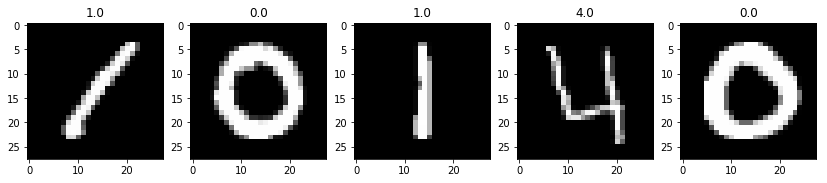

In [4]:
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(train_img[0:5, :], 1):
    subplot = fig.add_subplot(1, 7, i)
    plt.imshow(img[:,:,0], cmap='gray');
    subplot.set_title('%s' % train_label[i - 1]);

## Разбиваем выборку на обучение и валидацию

In [5]:
from sklearn.model_selection import train_test_split
y_train, y_val, x_train, x_val = train_test_split(
    train_label, train_img, test_size=0.2, random_state=42)

## Собираем сверточную сеть для обучения

In [6]:
keras.layers.Dense

(33600, 28, 28, 1)

In [38]:
glorot = keras.initializers.glorot_normal(seed=123455)

In [39]:
model = keras.models.Sequential()

model.add(keras.layers.Conv2D(6, 
                              kernel_size=(5, 5), 
                              padding='same', 
                              activation='relu', 
                              input_shape=x_train.shape[1:],
                              bias_initializer=glorot,
                              kernel_initializer=glorot))

model.add(keras.layers.MaxPool2D(pool_size=(2, 2), padding='valid'))


model.add(keras.layers.Conv2D(16, 
                              kernel_size=(5, 5),
                              padding='valid',
                              activation='relu', 
                              bias_initializer=glorot,
                              kernel_initializer=glorot))

model.add(keras.layers.MaxPool2D(pool_size=(2, 2), padding='valid'))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(10, activation='softmax',
                             bias_initializer=glorot,
                             kernel_initializer=glorot))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Выводим информацию о модели

In [34]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                4010      
Total params: 6,582
Trainable params: 6,582
Non-trainable params: 0
_________________________________________________________________


## One hot encoding разметки

In [35]:
from keras.utils import np_utils
y_train_labels = np_utils.to_categorical(y_train)

## Запускаем обучение

In [36]:
model.fit(x_train, y_train_labels,
          batch_size=32, 
          epochs=3,
          validation_split=0.2)

Train on 26880 samples, validate on 6720 samples
Epoch 1/3
26880/26880 [==============================] - 17s - loss: 3.4359 - acc: 0.7375 - val_loss: 0.2134 - val_acc: 0.9408
Epoch 2/3
26880/26880 [==============================] - 16s - loss: 0.1451 - acc: 0.9577 - val_loss: 0.1535 - val_acc: 0.9606
Epoch 3/3
26880/26880 [==============================] - 16s - loss: 0.0945 - acc: 0.9711 - val_loss: 0.1309 - val_acc: 0.9650


In [40]:
model.fit(x_train, y_train_labels,
          batch_size=32, 
          epochs=3,
          validation_split=0.2)

Train on 26880 samples, validate on 6720 samples
Epoch 1/3
26880/26880 [==============================] - 17s - loss: 1.1323 - acc: 0.8621 - val_loss: 0.1995 - val_acc: 0.9472
Epoch 2/3
26880/26880 [==============================] - 16s - loss: 0.1487 - acc: 0.9560 - val_loss: 0.1553 - val_acc: 0.9574
Epoch 3/3
26880/26880 [==============================] - 16s - loss: 0.1002 - acc: 0.9687 - val_loss: 0.1317 - val_acc: 0.9629


## Предсказываем класс объекта

In [13]:
pred_val = model.predict_classes(x_val)

8320/8400 [============================>.] - ETA: 0s

## Оцениваем качество решение на валидационной выборке

In [14]:
from sklearn.metrics import accuracy_score
print('Accuracy: %s' % accuracy_score(y_val, pred_val))

Accuracy: 0.963571428571


In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_val, pred_val))

             precision    recall  f1-score   support

        0.0       0.98      0.97      0.98       816
        1.0       0.99      0.98      0.99       909
        2.0       0.96      0.95      0.96       846
        3.0       0.98      0.94      0.96       937
        4.0       0.95      0.97      0.96       839
        5.0       0.97      0.96      0.97       702
        6.0       0.98      0.98      0.98       785
        7.0       0.94      0.97      0.96       893
        8.0       0.93      0.97      0.95       835
        9.0       0.96      0.94      0.95       838

avg / total       0.96      0.96      0.96      8400



In [16]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_val, pred_val))

[[792   1   2   0   2   1   7   2   4   5]
 [  0 890   6   1   1   1   1   1   5   3]
 [  5   2 805   7   5   0   0   8  13   1]
 [  1   0  11 879   1  10   0  11  21   3]
 [  2   0   0   0 815   0   2   5   2  13]
 [  0   1   0   6   2 677   2   1   9   4]
 [  3   0   1   0   5   4 767   0   5   0]
 [  0   0   5   1   4   3   0 870   4   6]
 [  3   0   5   4   5   2   3   2 809   2]
 [  2   1   1   3  16   1   0  22   2 790]]


## Предсказания на тестовыйх данных

In [17]:
pred_test = model.predict_classes(test_img)

28000/28000 [==============================] - 6s     


## Визуализируем предсказания

In [ ]:
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(test_img[0:5], 1):
    subplot = fig.add_subplot(1, 7, i)
    plt.imshow(img[:,:,0], cmap='gray');
    subplot.set_title('%s' % pred_test[i - 1]);

## Готовим файл для отправки

In [60]:
with open('submit.txt', 'w') as dst:
    dst.write('ImageId,Label\n')
    for i, p in enumerate(pred_test, 1):
        dst.write('%s,%s\n' % (i, p))

In [ ]:
# Your submission scored 0.96814